####**Downloading Dataset from Kaggle** 

In [1]:
# Downloading dataset:
from zipfile import ZipFile
import os

os.environ["KAGGLE_USERNAME"] = "frozenwolf"  # username from the json file
os.environ["KAGGLE_KEY"] = "a7184c2f35f489073ac20cc0926420dd"  # key from the json file
!kaggle datasets download -d praveengovi/coronahack-chest-xraydataset  # api copied from kaggle

# Create a ZipFile Object and load chest-xray-pneumonia.zip in it
with ZipFile("/content/coronahack-chest-xraydataset.zip", "r") as zipObj:
    # Extract all the contents of zip file in current directory
    zipObj.extractall()

# KAGGLE LINK: https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset


100% 1.18G/1.19G [00:14<00:00, 104MB/s] 
100% 1.19G/1.19G [00:14<00:00, 85.7MB/s]


####**Moving train dataset to designated directory** 

In [2]:
import os
import pandas as pd
import time
import shutil

PATH_TRAIN = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"
TOTAL_IMGS = len(os.listdir(PATH_TRAIN))
normal = 0
infected = 0
data = pd.read_csv("/content/Chest_xray_Corona_Metadata.csv")


img = data["X_ray_image_name"]
label = data["Label"]
image_type = data["Dataset_type"]
all_dir = os.listdir(PATH_TRAIN)

os.mkdir(PATH_TRAIN + "/INFECTED")
os.mkdir(PATH_TRAIN + "/NORMAL")

wrong_info = 0  # Checking if the provided list maps the images correctly

# Moving the train images to designated folders

for i in range(len(image_type)):
    if image_type[i] == "TRAIN":
        if img[i] in all_dir:
            if label[i] == "Normal":
                infected = infected + 1
                shutil.move(
                    PATH_TRAIN + "/" + img[i], PATH_TRAIN + "/" + "NORMAL/" + img[i]
                )
                normal = normal + 1

            else:

                shutil.move(
                    PATH_TRAIN + "/" + img[i], PATH_TRAIN + "/" + "INFECTED/" + img[i]
                )
                infected = infected + 1

        else:
            wrong_info = wrong_info + 1

print(
    "X-ray of Normal patients (TRAIN DATASET): " + str(normal),
    "X-ray of Infected patients (TRAIN DATASET): " + str(infected),
)


X-ray of Normal patients (TRAIN DATASET): 1342 X-ray of Infected patients (TRAIN DATASET): 5286


####**Visualizing train dataset** 

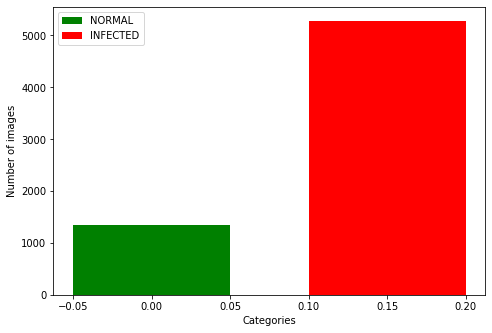

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [normal, infected]
ax.bar(0, number_of_imgs[0], color="g", width=0.1)
ax.bar(0.15, number_of_imgs[1], color="r", width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()


####**Moving test dataset to designated directory** 

In [4]:
PATH_TEST = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test"
TOTAL_IMGS = len(os.listdir(PATH_TEST))
normal = 0
infected = 0

img = data["X_ray_image_name"]
label = data["Label"]
image_type = data["Dataset_type"]
all_dir = os.listdir(PATH_TEST)

os.mkdir(PATH_TEST + "/INFECTED")
os.mkdir(PATH_TEST + "/NORMAL")

wrong_info = 0

for i in range(len(image_type)):
    if image_type[i] == "TEST":
        if img[i] in all_dir:
            if label[i] == "Normal":
                infected = infected + 1
                shutil.move(
                    PATH_TEST + "/" + img[i], PATH_TEST + "/" + "NORMAL/" + img[i]
                )
                normal = normal + 1

            else:

                shutil.move(
                    PATH_TEST + "/" + img[i], PATH_TEST + "/" + "INFECTED/" + img[i]
                )
                infected = infected + 1

        else:
            wrong_info = wrong_info + 1

print(
    "X-ray of Normal patients (TEST DATASET): " + str(normal),
    "X-ray of Infected patients (TEST DATASET): " + str(infected),
)



X-ray of Normal patients (TEST DATASET): 234 X-ray of Infected patients (TEST DATASET): 624


####**Visualizing test dataset** 

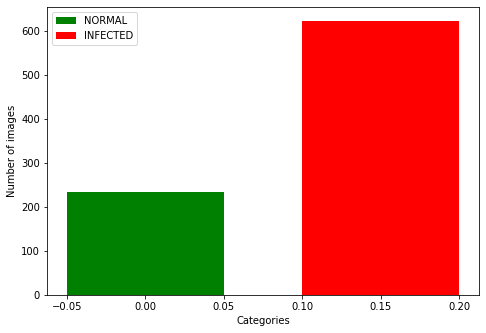

In [5]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [normal, infected]
ax.bar(0, number_of_imgs[0], color="g", width=0.1)
ax.bar(0.15, number_of_imgs[1], color="r", width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()

####**Exploring train dataset** 

In [6]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        n = 0
        for f in files:
            n = n+1
            if n>5:
                print('{}{}'.format(subindent, f),end = "  ...... \n")
                break
            print('{}{}'.format(subindent, f))


list_files("/content/Coronahack-Chest-XRay-Dataset")

Coronahack-Chest-XRay-Dataset/
    Coronahack-Chest-XRay-Dataset/
        train/
            jkms-35-e79-g001-l-d.jpg
            5083A6B7-8983-472E-A427-570A3E03DDEE.jpeg
            kjr-21-e24-g004-l-b.jpg
            1-s2.0-S0929664620300449-gr3_lrg-b.jpg
            1-s2.0-S0929664620300449-gr3_lrg-d.jpg
            1-s2.0-S0929664620300449-gr3_lrg-a.jpg  ...... 
            NORMAL/
                NORMAL2-IM-0450-0001.jpeg
                IM-0528-0001.jpeg
                NORMAL2-IM-1176-0001.jpeg
                IM-0505-0001-0001.jpeg
                NORMAL2-IM-1346-0001.jpeg
                IM-0665-0001.jpeg  ...... 
            INFECTED/
                person354_bacteria_1634.jpeg
                person1328_bacteria_3376.jpeg
                person291_bacteria_1376.jpeg
                person1492_virus_2599.jpeg
                person1381_bacteria_3517.jpeg
                person255_bacteria_1165.jpeg  ...... 
        test/
            NORMAL/
                NORMAL2-IM-0246-0

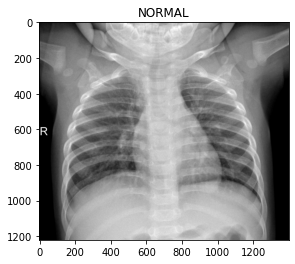

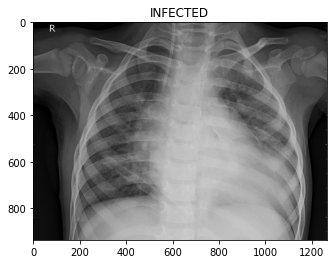

In [7]:
import cv2

normal_sample = cv2.imread(PATH_TRAIN+"/NORMAL/"+os.listdir(PATH_TRAIN+"/NORMAL")[3])
infected_sample = cv2.imread(PATH_TRAIN+"/INFECTED/"+os.listdir(PATH_TRAIN+"/INFECTED")[2])

plt.imshow(normal_sample)
plt.title("NORMAL")
plt.show()

plt.imshow(infected_sample)
plt.title("INFECTED")
plt.show()

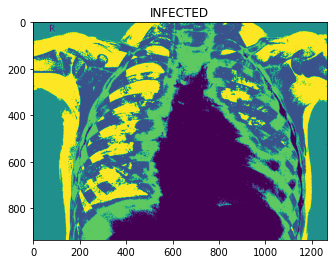

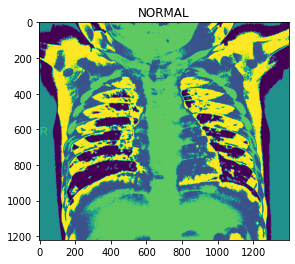

In [8]:
from sklearn import cluster
import numpy as np

kmeans = cluster.KMeans(5)
dims = np.shape(infected_sample)
pixel_matrix = np.reshape(infected_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("INFECTED")
plt.show()

kmeans = cluster.KMeans(5)
dims = np.shape(normal_sample)
pixel_matrix = np.reshape(normal_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("NORMAL")
plt.show()


####**Initializing the data loader** 

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import time
import torchvision
from PIL import ImageFile
import matplotlib.pyplot as plt
import cv2

In [0]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

PATH_TRAIN = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"
PATH_TEST  = "/content/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test"
EPOCHS = 50
BATCH_SIZE = 32
TOTAL_SIZE = len(os.listdir(PATH_TRAIN + "/NORMAL")) + len(
    os.listdir(PATH_TRAIN + "/INFECTED")
)
TOTAL_TEST_SIZE = len(os.listdir(PATH_TEST + "/NORMAL")) + len(
    os.listdir(PATH_TEST + "/INFECTED")
)
STEPS_PER_EPOCH = TOTAL_SIZE // BATCH_SIZE
STEPS_PER_TEST_EPOCH = TOTAL_TEST_SIZE // BATCH_SIZE
IMAGE_H, IMAGE_W = 224, 224

In [0]:
transform = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.Resize((IMAGE_H, IMAGE_W)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(30),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),
    ]
)  # Normalizing data

# Intitalizing the train data loader

train_dataset = torchvision.datasets.ImageFolder(root=PATH_TRAIN, transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

# Intitalizing the test data loader

test_dataset = torchvision.datasets.ImageFolder(
    root=PATH_TEST, transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

####**Initializing pretrained vgg16 model** 

In [12]:
model_ft = torchvision.models.vgg16_bn(pretrained=True)  # Initializing vgg16

num_features = model_ft.classifier[6].in_features
features = list(model_ft.classifier.children())[:-1]  # Remove last layer
features.extend([nn.Linear(num_features, 2)])  # Add our layer with 2 outputs
model_ft.classifier = nn.Sequential(*features)  # Replace the model classifier

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth


####**Initializing optimizers and loss function** 

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft.to(device)  # Sending model to device
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(
    model_ft.parameters(), lr=0.0007
)  # lr should be kept low so that the pre-trained weights don't change easily

####**TUNING THE MODEL (TRAINING)** 

In [14]:

loss_history = []

for i in range(EPOCHS):
    start = time.time()
    print(
        "-----------------------EPOCH "
        + str(i)
        + " -----------------------------------"
    )
    for batch_idx, (data, target) in enumerate(train_loader):
        if batch_idx == STEPS_PER_EPOCH:
            break
        optimizer.zero_grad()  # Resetting gradients
        # Sending input , target to device
        data = data.to(device)
        target = target.to(device)
        output = model_ft(data)
        loss = criterion(output, target.reshape((BATCH_SIZE,)).long())
        loss_history.append(loss.detach())
        loss.backward()
        optimizer.step()  # Optimizing the model

        # Checking train accuracy

        correct = 0
        incorrect = 0
        for p in range(BATCH_SIZE):
            a = []
            for j in output[p]:
                a.append(float(j.detach()))

            pred = a.index(max(a))

            if pred == int(target[p]):
                correct = correct + 1

            else:

                incorrect = incorrect + 1

        print(
            "\rEPOCH "
            + str(i)
            + " MINIBATCH: "
            + str(batch_idx)
            + "/"
            + str(STEPS_PER_EPOCH)
            + " LOSS: "
            + str(loss_history[-1])
            + " ACC: "
            + str(correct / (incorrect + correct)),
            end = ""
            
        )

    end = time.time()
    print(
        "EPOCH "
        + str(i)
        + " LOSS "
        + str(sum(loss_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
        + " ETA: "
        + str(end - start)
        + " \n MAX LOSS: "
        + str(max(loss_history[-STEPS_PER_EPOCH:]))
        + " MIN LOSS: "
        + str(min(loss_history[-STEPS_PER_EPOCH:]))
    )


-----------------------EPOCH 0 -----------------------------------
EPOCH 0 MINIBATCH: 164/165 LOSS: tensor(0.1779, device='cuda:0') ACC: 0.90625EPOCH 0 LOSS tensor(0.3086, device='cuda:0') ETA: 132.68870949745178 
 MAX LOSS: tensor(1.4269, device='cuda:0') MIN LOSS: tensor(0.0576, device='cuda:0')
-----------------------EPOCH 1 -----------------------------------
EPOCH 1 MINIBATCH: 164/165 LOSS: tensor(0.1251, device='cuda:0') ACC: 0.9375EPOCH 1 LOSS tensor(0.2112, device='cuda:0') ETA: 139.2628197669983 
 MAX LOSS: tensor(0.8112, device='cuda:0') MIN LOSS: tensor(0.0160, device='cuda:0')
-----------------------EPOCH 2 -----------------------------------
EPOCH 2 MINIBATCH: 164/165 LOSS: tensor(0.3216, device='cuda:0') ACC: 0.875EPOCH 2 LOSS tensor(0.1822, device='cuda:0') ETA: 141.11604762077332 
 MAX LOSS: tensor(0.7254, device='cuda:0') MIN LOSS: tensor(0.0099, device='cuda:0')
-----------------------EPOCH 3 -----------------------------------
EPOCH 3 MINIBATCH: 164/165 LOSS: tensor(

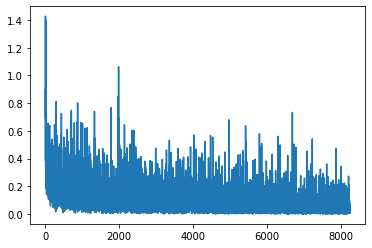

In [15]:
plt.plot(loss_history)

####**TESTING THE MODEL** 

In [16]:
def get_test():
    test_loss = []
    correct = 0
    incorrect = 0

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    for batch_idx, (data, target) in enumerate(test_loader):
        if batch_idx == STEPS_PER_TEST_EPOCH:
            break

        # Model is used to predict the test data so we are switching off the gradient

        with torch.no_grad():

            data = data.to(device)
            target = target.long().to(device)
            output = model_ft(data)
            criterion = nn.CrossEntropyLoss()
            loss = criterion(output, target)

            for i in range(BATCH_SIZE):
                a = []
                for j in output[i]:
                    a.append(float(j.detach()))

                pred = a.index(max(a))

                if pred == int(target[i]):
                    correct = correct + 1

                else:
                    incorrect = incorrect + 1

        test_loss.append(float(loss.detach()))
    print("CORRECT: " + str(correct), "INCORRECT: " + str(incorrect))
    return (
        "TEST_ACC : "
        + str(correct / (correct + incorrect))
        + " TEST_LOSS: "
        + str(float(sum(test_loss) / len(test_loss)))
    )


get_test()  # Checking accuracy of model with test data


CORRECT: 523 INCORRECT: 85


'TEST_ACC : 0.8601973684210527 TEST_LOSS: 0.7561329113025415'